## Table of Contents

### 1. Data Loading and Preprocessing 
> #### 1.1 Load the Data
> #### 1.2 Data Exploration
> #### 1.3 Data Preprocessing
### 2. Image Segmentation through Thresholding
> #### 2.1 Convert image to grayscale
> #### 2.2 Apply the right threshold
> #### 2.3 Calculate IoU score


---



### 1. Data Loading and Preprocessing

#### 1.1 Load the Data

In [1]:
# Upload data from drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# get images
!unzip /content/drive/My\ Drive/images_BloodCellSegmentation.zip

Archive:  /content/drive/My Drive/images_BloodCellSegmentation.zip
  inflating: images_BloodCellSegmentation/001.bmp  
  inflating: images_BloodCellSegmentation/002.bmp  
  inflating: images_BloodCellSegmentation/003.bmp  
  inflating: images_BloodCellSegmentation/004.bmp  
  inflating: images_BloodCellSegmentation/005.bmp  
  inflating: images_BloodCellSegmentation/006.bmp  
  inflating: images_BloodCellSegmentation/007.bmp  
  inflating: images_BloodCellSegmentation/008.bmp  
  inflating: images_BloodCellSegmentation/009.bmp  
  inflating: images_BloodCellSegmentation/010.bmp  
  inflating: images_BloodCellSegmentation/011.bmp  
  inflating: images_BloodCellSegmentation/012.bmp  
  inflating: images_BloodCellSegmentation/013.bmp  
  inflating: images_BloodCellSegmentation/014.bmp  
  inflating: images_BloodCellSegmentation/015.bmp  
  inflating: images_BloodCellSegmentation/016.bmp  
  inflating: images_BloodCellSegmentation/017.bmp  
  inflating: images_BloodCellSegmentation/018.bmp

In [3]:
# get targets
!unzip /content/drive/My\ Drive/targets_BloodCellSegmentation.zip

Archive:  /content/drive/My Drive/targets_BloodCellSegmentation.zip
  inflating: targets_BloodCellSegmentation/001.png  
  inflating: targets_BloodCellSegmentation/002.png  
  inflating: targets_BloodCellSegmentation/003.png  
  inflating: targets_BloodCellSegmentation/004.png  
  inflating: targets_BloodCellSegmentation/005.png  
  inflating: targets_BloodCellSegmentation/006.png  
  inflating: targets_BloodCellSegmentation/007.png  
  inflating: targets_BloodCellSegmentation/008.png  
  inflating: targets_BloodCellSegmentation/009.png  
  inflating: targets_BloodCellSegmentation/010.png  
 extracting: targets_BloodCellSegmentation/011.png  
 extracting: targets_BloodCellSegmentation/012.png  
  inflating: targets_BloodCellSegmentation/013.png  
  inflating: targets_BloodCellSegmentation/014.png  
  inflating: targets_BloodCellSegmentation/015.png  
  inflating: targets_BloodCellSegmentation/016.png  
 extracting: targets_BloodCellSegmentation/017.png  
 extracting: targets_BloodCellS

#### 1.2 Data Exploration

In [0]:
# import libraries and modules
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from skimage.color import rgb2gray

In [0]:
# read sample image
img = Image.open('/content/images_BloodCellSegmentation/002.bmp')

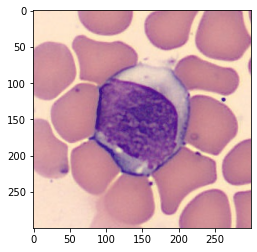

In [6]:
# plot image
plt.imshow(img)

In [7]:
# print type 
type(img)

PIL.BmpImagePlugin.BmpImageFile

In [0]:
# convert to numpy array
img = np.array(img)

In [9]:
# print shape of image
img.shape

(300, 300, 3)

In [0]:
# read sample target
gt_mask = Image.open('/content/targets_BloodCellSegmentation/002.png')

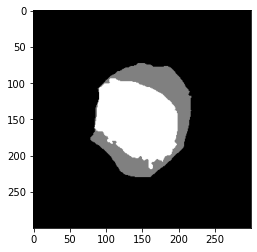

In [11]:
# plot target 
plt.imshow(gt_mask, cmap='gray')

In [0]:
# convert to numpy array
gt_mask = np.array(gt_mask)

In [13]:
# print target shape
gt_mask.shape

(300, 300)

#### 1.3 Data Preprocessing

In [14]:
# get unique values
np.unique(gt_mask)

array([  0, 128, 255], dtype=uint8)

In [0]:
# simplify unique values
gt_mask = ((gt_mask == 128) | (gt_mask == 255)).astype(int)

In [16]:
# get unique values again
np.unique(gt_mask)

array([0, 1])

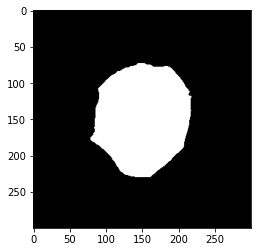

In [17]:
# plot cleaned target
plt.imshow(gt_mask, cmap='gray')

### 2. Image Segmentation through Thresholding

![alt text](https://drive.google.com/uc?id=1xx3i1SyjzYEckD5je5ZPwLen_IA9bW3L)

#### 2.1 Convert image to grayscale

In [0]:
# convert color image to grayscale
gray = rgb2gray(img)

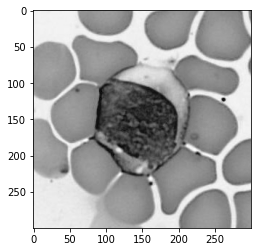

In [19]:
# plot image
plt.imshow(gray, cmap='gray')

#### 2.2 Apply the right threshold

In [20]:
# get mean
gray.mean()

0.6242395964270153

In [0]:
# make another numpy array of same values
mask = gray.copy()

In [0]:
# apply threshold
mask = (mask < gray.mean()).astype(int)

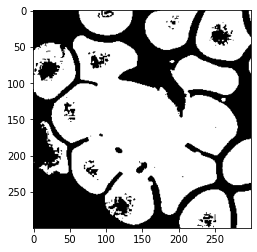

In [23]:
# plot prediction
plt.imshow(mask, cmap='gray')

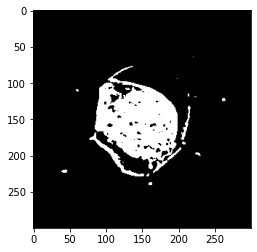

In [25]:
# Try for a different threshold
## make another numpy array of same values
mask = gray.copy()
## apply threshold
mask = (mask < 0.4).astype(int)
## plot prediction
plt.imshow(mask, cmap='gray')

#### 2.3 Calculate IoU score

In [0]:
# make new numpy array of same values
pred = mask.ravel().copy()
target = gt_mask.ravel().copy()

In [0]:
# get class indices for WBC
pred_inds = pred == 1
target_inds = target == 1

In [28]:
# calculate intersection
intersection = pred_inds[target_inds].sum()
print(intersection)

9733


In [29]:
# calculate union
union = pred_inds.sum() + target_inds.sum() - intersection
print(union)

16392


In [30]:
# get IoU score
iou = (float(intersection) / float(max(union, 1)))
print(iou)

0.5937652513421181
